<font color='red' size='5'>Problem 2</font>

Use the housing dataset house.csv. This dataset contains information about the
sales price of houses along with other attributes. Analyse this dataset using pandas library and
plot some interesting information using matplotlib library.
1. Load the data using pandas.
2. Summarize each field in the data, i.e. mean, average etc.
3. Group data by the field furnishingstatus.

(a) Give average sqft, average price and average bedroom of each group.

(b) Plot for each field (sqft, bedroom, price etc). Use a boxplot that visualizes the
statistical information about them.

(c) For each group of furnishingstatus, draw a prediction line for price vs sqft

<font color='red' size='5'>Housing Dataset</font>


#Load the data using pandaS
import pandas as pd
import seaborn as sns
df = pd.read_csv("Housing.csv")
df.head(5)

In [4]:
df.tail(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [13]:
df.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
mean = df['price'].mean()
mean

4766729.247706422

In [7]:
mean = df['area'].mean()
mean

5150.54128440367

In [17]:
mean = df['bedrooms'].mean()
mean

2.9651376146788992

In [18]:
mean = df['bathrooms'].mean()
mean

1.2862385321100918

In [14]:
g = df.groupby("furnishingstatus")
g


In [15]:
df.groupby("furnishingstatus")["area"].mean()

furnishingstatus
furnished         5688.100000
semi-furnished    5166.339207
unfurnished       4707.595506
Name: area, dtype: float64

In [16]:
df.groupby("furnishingstatus")["price"].mean()

furnishingstatus
furnished         5.495696e+06
semi-furnished    4.907524e+06
unfurnished       4.013831e+06
Name: price, dtype: float64

In [19]:
df.groupby("furnishingstatus")["bedrooms"].mean()

furnishingstatus
furnished         3.064286
semi-furnished    3.008811
unfurnished       2.831461
Name: bedrooms, dtype: float64

In [20]:
df.groupby("furnishingstatus")["bathrooms"].mean()

furnishingstatus
furnished         1.378571
semi-furnished    1.303965
unfurnished       1.191011
Name: bathrooms, dtype: float64

In [22]:
result = df.groupby("furnishingstatus")["bathrooms"].mean().reset_index(name='mean_bathrooms')
result

,furnishingstatus,mean_bathrooms
0,furnished,1.378571
1,semi-furnished,1.303965
2,unfurnished,1.191011



<font color='red' size='5'>(a) Give average sqft, average price and average bedroom of each group.</font>

In [23]:
# group data by the field furnishingstatus then give average of price, bedrooms and area.
df.groupby("furnishingstatus").agg(
    {"area": "mean", "price": "mean", "bedrooms": "mean"}
)

,area,price,bedrooms
furnishingstatus,,,
furnished,5688.100000,5.495696e+06,3.064286
semi-furnished,5166.339207,4.907524e+06,3.008811
unfurnished,4707.595506,4.013831e+06,2.831461


Text(0.5, 0, 'Price')

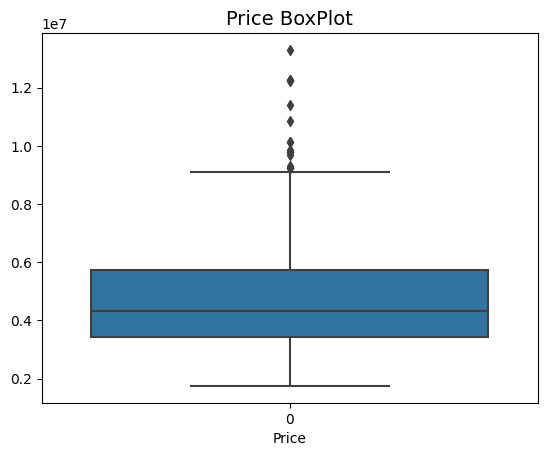

In [31]:
sns.boxplot(df['price'])
plt.title('Price BoxPlot', fontsize=14)
plt.xlabel('Price')

Text(0.5, 0, 'area')

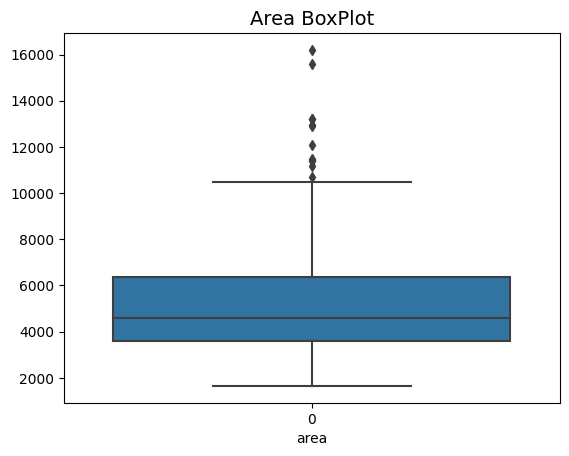

In [32]:
sns.boxplot(df['area'])
plt.title('Area BoxPlot', fontsize=14)
plt.xlabel('area')

Text(0.5, 0, 'BedRooms')

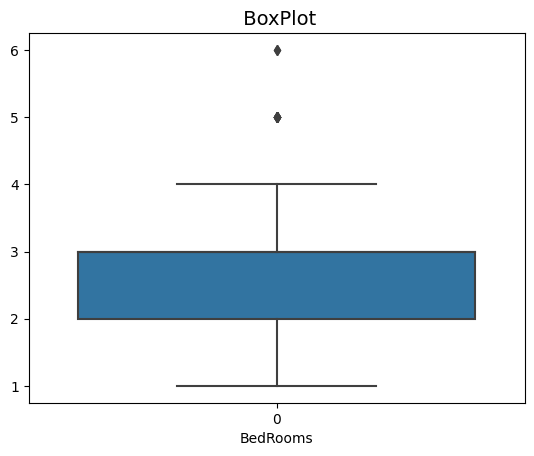

In [34]:
sns.boxplot(df['bedrooms'])
plt.title(' BoxPlot', fontsize=14)
plt.xlabel('BedRooms')


<font color='red' size='5'>(b) Plot for each field (sqft, bedroom, price etc). Use a boxplot that visualizes the
statistical information about them.</font>


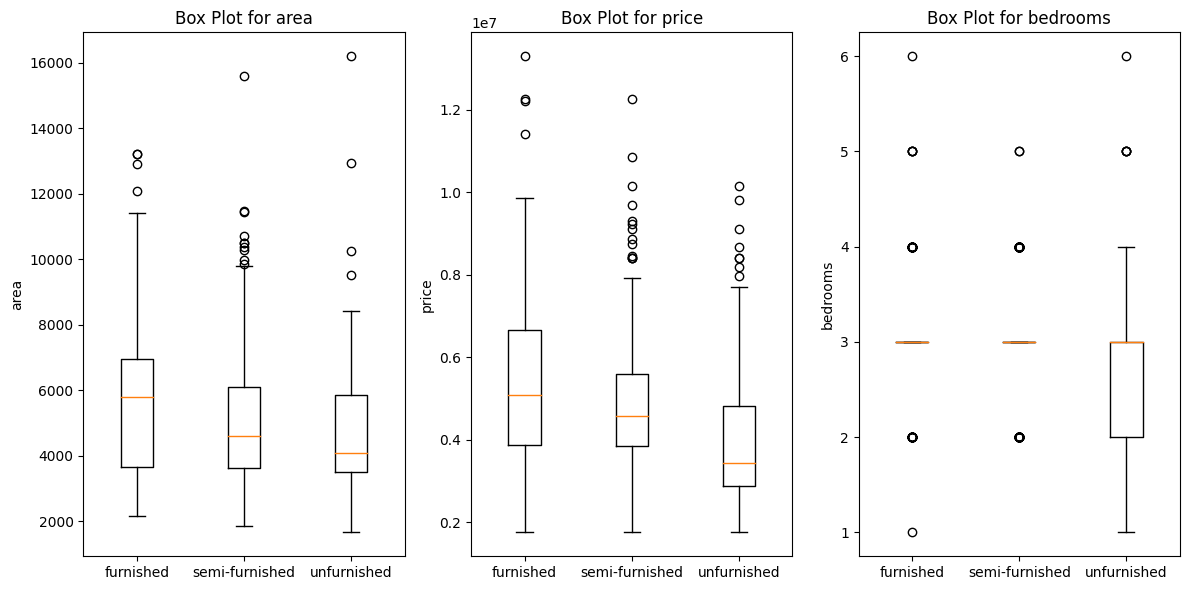

In [37]:

grouped = df.groupby("furnishingstatus")

# Extract columns for plotting
columns_to_plot = ["area", "price", "bedrooms"]

# Create subplots for each column
plt.figure(figsize=(12, 6))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 3, i)
    plt.boxplot([group[column] for name, group in grouped], labels=grouped.groups.keys())
    plt.title(f'Box Plot for {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()









<font color='red' size='5'>(c)For each group of furnishingstatus, draw a prediction line for price vs sqft.</font>


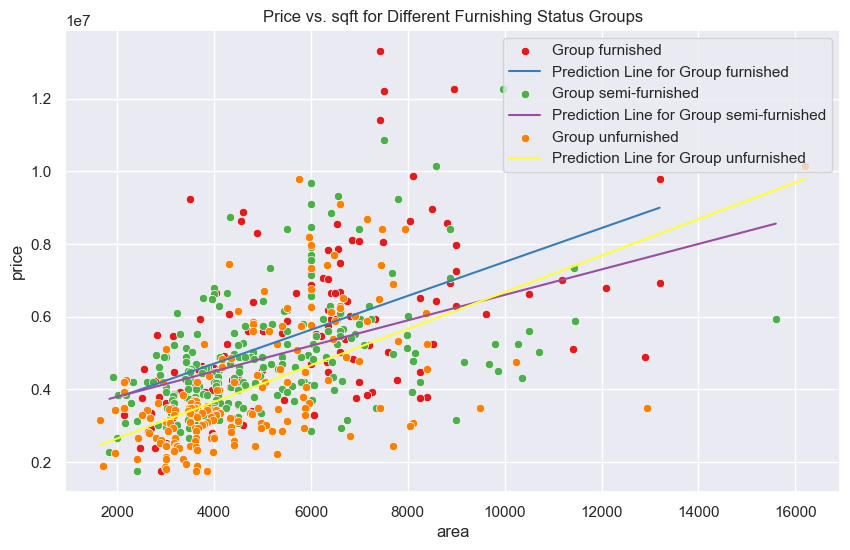

In [53]:

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Create a scatterplot with regression lines for each group
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")

# Define a color palette for the different groups
palette = sns.color_palette("Set1")

# Iterate through each group
for name, group in df.groupby("furnishingstatus"):
    # Fit a linear regression model
    model = LinearRegression()
    X = group[['area']]
    y = group['price']
    model.fit(X, y)

    # Create prediction line
    x_range = range(min(X['area']), max(X['area']))
    y_pred = model.predict([[x] for x in x_range])

    # Plot data points
    sns.scatterplot(x='area', y='price', data=group, label=f'Group {name}', color=palette.pop(0))

    # Plot prediction line
    plt.plot(x_range, y_pred, label=f'Prediction Line for Group {name}', color=palette.pop(0))

plt.xlabel('area')
plt.ylabel('price')
plt.title('Price vs. sqft for Different Furnishing Status Groups')
plt.legend()
plt.show()


